In [81]:
# importing required Pakages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#Converting csv to Dataframe

df=pd.read_csv('2012-2022_FIA_WEC_LAP_DATA.csv')
df

C:\Users\joeva\AppData\Local\Temp\ipykernel_12200\1351903942.py:3: DtypeWarning: Columns (26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('2012-2022_FIA_WEC_LAP_DATA.csv')


,Unnamed: 0,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,...,team_stint,elapsed_ms,position,class_position,interval_ms,interval,gap,class_interval,class_gap,elapsed_s
0,0,57,1,1,0 days 00:02:23.141000,0,NaN,52.533,0,45.335,...,Krohn Racing #57 Stint #1,143141,20.0,1.0,349.0,0.349,26.922,0.000,0.000,143.141
1,1,88,2,1,0 days 00:02:24.016000,0,NaN,52.915,0,45.342,...,Team Felbermayr-Proton #88 Stint #1,144016,21.0,2.0,875.0,0.875,27.797,0.875,0.875,144.016
2,2,50,2,1,0 days 00:02:25.278000,0,NaN,53.568,0,45.577,...,Larbre Competition #50 Stint #1,145278,22.0,3.0,1262.0,1.262,29.059,1.262,2.137,145.278
3,3,70,2,1,0 days 00:02:25.548000,0,NaN,53.938,0,45.614,...,Larbre Competition #70 Stint #1,145548,23.0,4.0,270.0,0.270,29.329,0.270,2.407,145.548
4,4,61,2,1,0 days 00:02:25.859000,0,NaN,54.482,0,45.816,...,AF Corse-Waltrip #61 Stint #1,145859,24.0,5.0,311.0,0.311,29.640,0.311,2.718,145.859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503675,503675,7,3,378,0 days 00:03:32.801000,0,NaN,33.645,0,80.892,...,Toyota Gazoo Racing #7 Stint #33,86220663,2.0,2.0,121119.0,121.119,212.801,121.119,121.119,86220.663
503676,503676,8,2,379,0 days 00:03:32.310000,0,NaN,33.323,0,80.052,...,Toyota Gazoo Racing #8 Stint #32,86311854,1.0,1.0,91191.0,91.191,91.191,0.000,0.000,86311.854
503677,503677,7,3,379,0 days 00:03:33.348000,0,NaN,34.550,0,81.034,...,Toyota Gazoo Racing #7 Stint #33,86434011,2.0,2.0,122157.0,122.157,213.348,122.157,122.157,86434.011
503678,503678,8,2,380,0 days 00:03:36.142000,0,NaN,33.452,0,80.406,...,Toyota Gazoo Racing #8 Stint #32,86527996,1.0,1.0,93985.0,93.985,93.985,0.000,0.000,86527.996


In [83]:
# number: The car number that completed the lap
# driver_number: The driver of the car number that completed the lap
# lap_number: The lap number of the race the lap was completed at
# lap_time: The lap time recorded as they crossed the timing beam
# lap_improvement: Haven't looked into this, but my guess would a variable showing if the driver made improvement vs previous lap_times. Likely 0 is no improvement, 1 is green (personal best), 2 is purple (race best), and 3 is a WR? 99% of the laps have 0 improvement, so further research probably needed.
# crossing_finish_line_in_pit: boolean for if they crossed the finish line, B if they did, nan else
# s1, s2, s3 The sector times recorded as they crossed the timing beam (recorded in ss.mss)
# s1/s2/s3_improvement similar to lap_improvement
# s1/s2/s3_large: how they crossed the timing beams similar to lap_time
# kph: the average kph of the lap
# top_speed: the fastest recorded time of the lap
# driver_name: the driver that recorded the lap
# pit_time: the recorded time that was spent in the pitlane (typically followed by "B" in crossing_finish_line_in_pit)
# class: the class of the car that set the lap time
# group: the group of the car that set the lap time, only applicable to LMP1s and LMP2 Pro/Am (2021 season?)
# team: the team of the car that set the lap
# manufacturer: the manufacturer of the car that set the lap
# season: the WEC season the lap was set at
# circuit: the circuit the lap was set at
# round: the round (race number in the championship) the lap was set at
# vehicle: the car the lap was set with
# flag_at_fl: the flag status at the timing beam (only for 2022)
# lap_time_ms: The lap time recorded in milliseconds (seconds*1000)
# lap_time_s: the lap time recorded in seconds
# team_no: A combination of team and the team's number e.g Toyota Gazoo Racing #7
# engine: The engine of the car the lap was set with.
# driver_stint_no: Labeling the driver stint. A stint changes when the driver pits and either a. stays in the car, or b. swaps into the car.
# driver_stint: A combination of driver_name and the driver_stint_no, e.g. Mike CONWAY Stint #1
# team_stint_no: Labeling the team stint. A stint changes when the driver pits.
# team_stint: A combination of team_no and the team_stint_no, e.g. Toyota Gazoo Racing #7 Stint #1
# position: The position of the car at the time of the lap.
# class_position: The position of the car in class at the time of the lap.
# interval_ms: The interval (gap to the car in front for position) in ms
# interval: The interval (gap to the car in front for position) in s
# gap: The total time to the leader (time to 1st position overall) in s
# class_interval: The interval (gap to the car in front for position in class) in s
# class_gap The total time to the leader (time to 1st position in class) in s

In [84]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503680 entries, 0 to 503679
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   503680 non-null  int64  
 1   number                       503680 non-null  int64  
 2   driver_number                503680 non-null  int64  
 3   lap_number                   503680 non-null  int64  
 4   lap_time                     503680 non-null  object 
 5   lap_improvement              503680 non-null  int64  
 6   crossing_finish_line_in_pit  28445 non-null   object 
 7   s1                           503569 non-null  float64
 8   s1_improvement               503680 non-null  int64  
 9   s2                           503406 non-null  float64
 10  s2_improvement               503680 non-null  int64  
 11  s3                           503486 non-null  float64
 12  s3_improvement               503680 non-null  int64  
 13 

In [85]:
df.describe()

,Unnamed: 0,number,driver_number,lap_number,lap_improvement,s1,s1_improvement,s2,s2_improvement,s3,...,team_stint_no,elapsed_ms,position,class_position,interval_ms,interval,gap,class_interval,class_gap,elapsed_s
count,503680.00000,503680.000000,503680.000000,503680.000000,503680.000000,503569.000000,503680.000000,503406.000000,503680.000000,503486.000000,...,503680.000000,5.036800e+05,503680.000000,503680.000000,5.036800e+05,503680.000000,503680.000000,503680.000000,503680.000000,503680.000000
mean,251839.50000,53.766256,1.341775,118.358517,0.010076,44.221335,0.018857,63.995318,0.018887,65.954284,...,8.182618,2.251623e+07,18.534333,5.700790,1.589048e+05,158.904821,2179.684949,131.506613,420.611197,22516.229955
std,145400.03613,67.623157,0.940485,83.514817,0.143167,111.896698,0.170342,29.421726,0.170484,48.209154,...,8.055612,2.175151e+07,12.772971,4.364912,5.976172e+05,597.617202,2859.444803,582.349385,985.250399,21751.510146
min,0.00000,0.000000,0.000000,1.000000,0.000000,16.690000,0.000000,25.266000,0.000000,15.220000,...,0.000000,8.438800e+04,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,84.388000
25%,125919.75000,25.000000,1.000000,52.000000,0.000000,33.644000,0.000000,42.750000,0.000000,35.252000,...,3.000000,7.497529e+06,8.000000,2.000000,6.773000e+03,6.773000,338.071750,2.748000,15.846000,7497.528750
50%,251839.50000,47.000000,1.000000,104.000000,0.000000,36.712000,0.000000,52.883500,0.000000,44.798000,...,5.000000,1.514634e+07,17.000000,5.000000,3.163300e+04,31.633000,1182.121000,20.409000,96.684500,15146.341500
75%,377759.25000,77.000000,2.000000,166.000000,0.000000,39.343000,0.000000,85.384000,0.000000,102.728000,...,10.000000,2.769537e+07,26.000000,8.000000,1.165655e+05,116.565500,2634.542250,83.238250,375.221000,27695.366750
max,503679.00000,777.000000,3.000000,395.000000,3.000000,18025.929000,3.000000,3646.889000,3.000000,3653.638000,...,50.000000,8.692520e+07,62.000000,27.000000,2.455741e+07,24557.407000,40495.937000,24557.407000,27002.532000,86925.196000


In [86]:
df.shape

(503680, 48)

#### Preprocessing

In [87]:
df.isna().sum()

Unnamed: 0                          0
number                              0
driver_number                       0
lap_number                          0
lap_time                            0
lap_improvement                     0
crossing_finish_line_in_pit    475235
s1                                111
s1_improvement                      0
s2                                274
s2_improvement                      0
s3                                194
s3_improvement                      0
kph                                 0
elapsed                             0
hour                                0
s1_large                          116
s2_large                          281
s3_large                          201
top_speed                        1949
driver_name                         0
pit_time                       475036
class                               0
group                          423118
team                                0
manufacturer                        0
season      

In [88]:
# Removing columns With large number of missing values

df.drop(columns=['crossing_finish_line_in_pit','group','flag_at_fl','pit_time'],axis=1,inplace=True)
df.shape

(503680, 44)

In [89]:
# fill ing missing values

df['s1']=df['s1'].fillna(df['s1'].mean())
df['s2']=df['s2'].fillna(df['s2'].mean())
df['s3']=df['s3'].fillna(df['s3'].mean())
df['top_speed']=df['top_speed'].fillna(df['top_speed'].median())
df['s1_large']=df['s1_large'].fillna(df['s1_large'].mode()[0])
df['s2_large']=df['s2_large'].fillna(df['s2_large'].mode()[0])
df['s3_large']=df['s3_large'].fillna(df['s3_large'].mode()[0])

df.isna().sum()

Unnamed: 0         0
number             0
driver_number      0
lap_number         0
lap_time           0
lap_improvement    0
s1                 0
s1_improvement     0
s2                 0
s2_improvement     0
s3                 0
s3_improvement     0
kph                0
elapsed            0
hour               0
s1_large           0
s2_large           0
s3_large           0
top_speed          0
driver_name        0
class              0
team               0
manufacturer       0
season             0
circuit            0
round              0
vehicle            0
team_no            0
lap_time_ms        0
lap_time_s         0
engine             0
driver_stint_no    0
driver_stint       0
team_stint_no      0
team_stint         0
elapsed_ms         0
position           0
class_position     0
interval_ms        0
interval           0
gap                0
class_interval     0
class_gap          0
elapsed_s          0
dtype: int64

In [90]:
df.columns

Index(['Unnamed: 0', 'number', 'driver_number', 'lap_number', 'lap_time',
       'lap_improvement', 's1', 's1_improvement', 's2', 's2_improvement', 's3',
       's3_improvement', 'kph', 'elapsed', 'hour', 's1_large', 's2_large',
       's3_large', 'top_speed', 'driver_name', 'class', 'team', 'manufacturer',
       'season', 'circuit', 'round', 'vehicle', 'team_no', 'lap_time_ms',
       'lap_time_s', 'engine', 'driver_stint_no', 'driver_stint',
       'team_stint_no', 'team_stint', 'elapsed_ms', 'position',
       'class_position', 'interval_ms', 'interval', 'gap', 'class_interval',
       'class_gap', 'elapsed_s'],
      dtype='object')

In [91]:
df['class'].unique()

array(['LMGTE Am', 'LMGTE Pro', 'LMP1', 'LMP2', 'CDNT', 'LMP1-H',
       'LMP1-L', 'HYPERCAR', 'INNOVATIVE CAR'], dtype=object)

C:\Users\joeva\AppData\Local\Temp\ipykernel_12200\2810177227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class',data=df,palette='pastel')


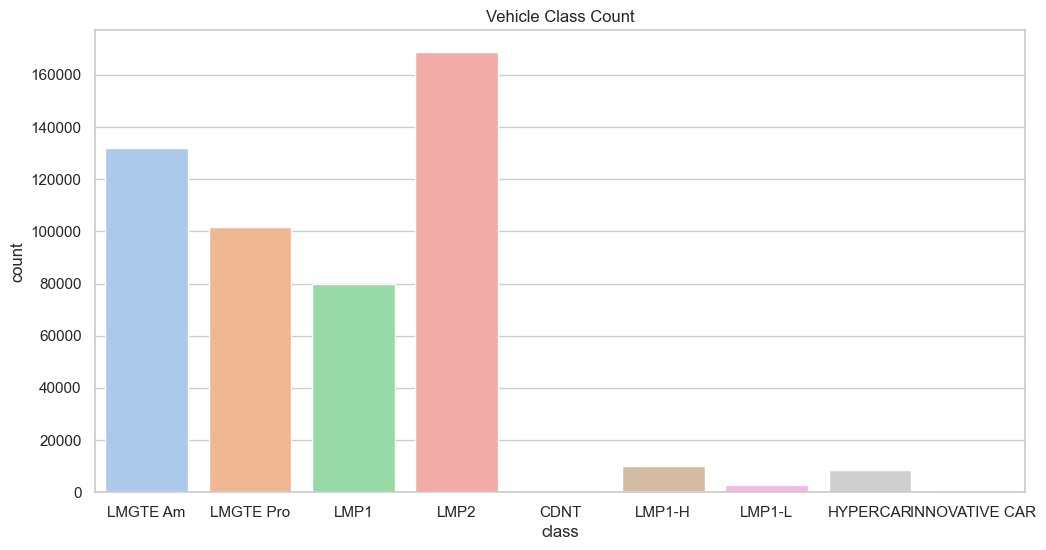

In [92]:
plt.figure(figsize=(12,6))
sns.countplot(x='class',data=df,palette='pastel')
plt.title('Vehicle Class Count')
plt.show()

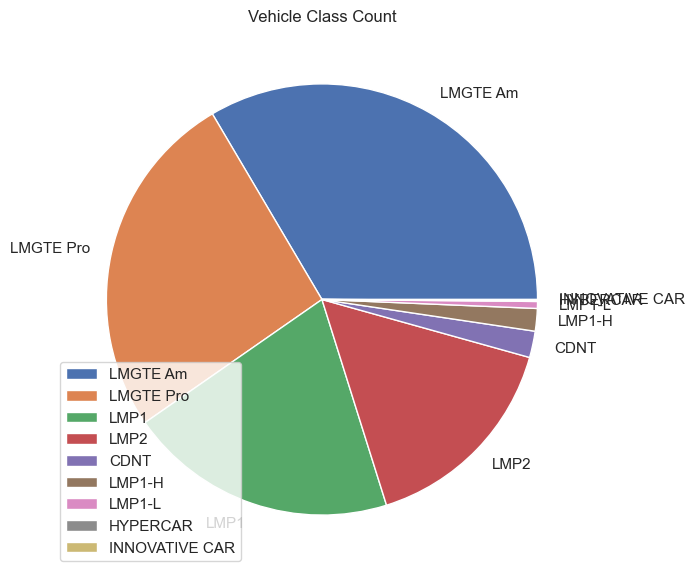

In [93]:
plt.figure(figsize=(7,7))
plt.pie(df['class'].value_counts(),labels=df['class'].unique())
plt.title('Vehicle Class Count')
plt.legend(loc='lower left')
plt.show()

In [94]:
df['class'].value_counts()

class
LMP2              168680
LMGTE Am          131889
LMGTE Pro         101579
LMP1               79703
LMP1-H              9978
HYPERCAR            8512
LMP1-L              2610
CDNT                 395
INNOVATIVE CAR       334
Name: count, dtype: int64

In [95]:
correlation = df.corr(numeric_only=True)
correlation

,Unnamed: 0,number,driver_number,lap_number,lap_improvement,s1,s1_improvement,s2,s2_improvement,s3,...,team_stint_no,elapsed_ms,position,class_position,interval_ms,interval,gap,class_interval,class_gap,elapsed_s
Unnamed: 0,1.000000,0.152717,0.452919,0.095062,-0.003373,-0.003881,-0.003862,0.064071,-0.003995,0.103215,...,0.142799,0.108631,0.155152,0.210794,-0.031325,-0.031325,0.002395,-0.027880,-0.010323,0.108631
number,0.152717,1.000000,0.060586,-0.004937,-0.000302,0.002528,-0.000468,0.057649,-0.000492,0.050256,...,-0.023471,0.024536,0.249014,-0.000028,0.002826,0.002826,0.093921,0.004187,-0.019411,0.024536
driver_number,0.452919,0.060586,1.000000,0.112882,0.006348,0.001668,0.000977,0.096766,0.000430,0.111172,...,0.137494,0.125427,0.096540,0.125226,0.015109,0.015109,0.052141,0.017812,0.035509,0.125427
lap_number,0.095062,-0.004937,0.112882,1.000000,-0.005095,0.000449,-0.010673,0.251113,-0.012694,0.273347,...,0.874654,0.909503,0.020658,0.071220,0.157808,0.157808,0.622642,0.129993,0.352801,0.909503
lap_improvement,-0.003373,-0.000302,0.006348,-0.005095,1.000000,-0.006114,0.211529,-0.021345,0.338886,-0.019792,...,-0.006373,-0.007413,-0.006356,-0.008046,-0.000332,-0.000332,-0.003523,0.000613,-0.001747,-0.007413
s1,-0.003881,0.002528,0.001668,0.000449,-0.006114,1.000000,-0.009457,0.076707,-0.003624,0.049355,...,0.028247,0.029485,0.061496,0.051093,0.096799,0.096799,0.075229,0.099828,0.102484,0.029485
s1_improvement,-0.003862,-0.000468,0.000977,-0.010673,0.211529,-0.009457,1.000000,-0.027185,0.129869,-0.023872,...,-0.013648,-0.013713,-0.007427,-0.009215,-0.000727,-0.000727,-0.008353,0.000034,-0.004201,-0.013713
s2,0.064071,0.057649,0.096766,0.251113,-0.021345,0.076707,-0.027185,1.000000,-0.030769,0.690158,...,0.471505,0.493342,0.407149,0.320668,0.110207,0.110207,0.456218,0.106857,0.271947,0.493342
s2_improvement,-0.003995,-0.000492,0.000430,-0.012694,0.338886,-0.003624,0.129869,-0.030769,1.000000,-0.025459,...,-0.013597,-0.014581,-0.007222,-0.007720,-0.000914,-0.000914,-0.008573,0.000189,-0.004680,-0.014581
s3,0.103215,0.050256,0.111172,0.273347,-0.019792,0.049355,-0.023872,0.690158,-0.025459,1.000000,...,0.454573,0.477531,0.366041,0.308628,0.110132,0.110132,0.425967,0.107173,0.266858,0.477531


<Axes: >

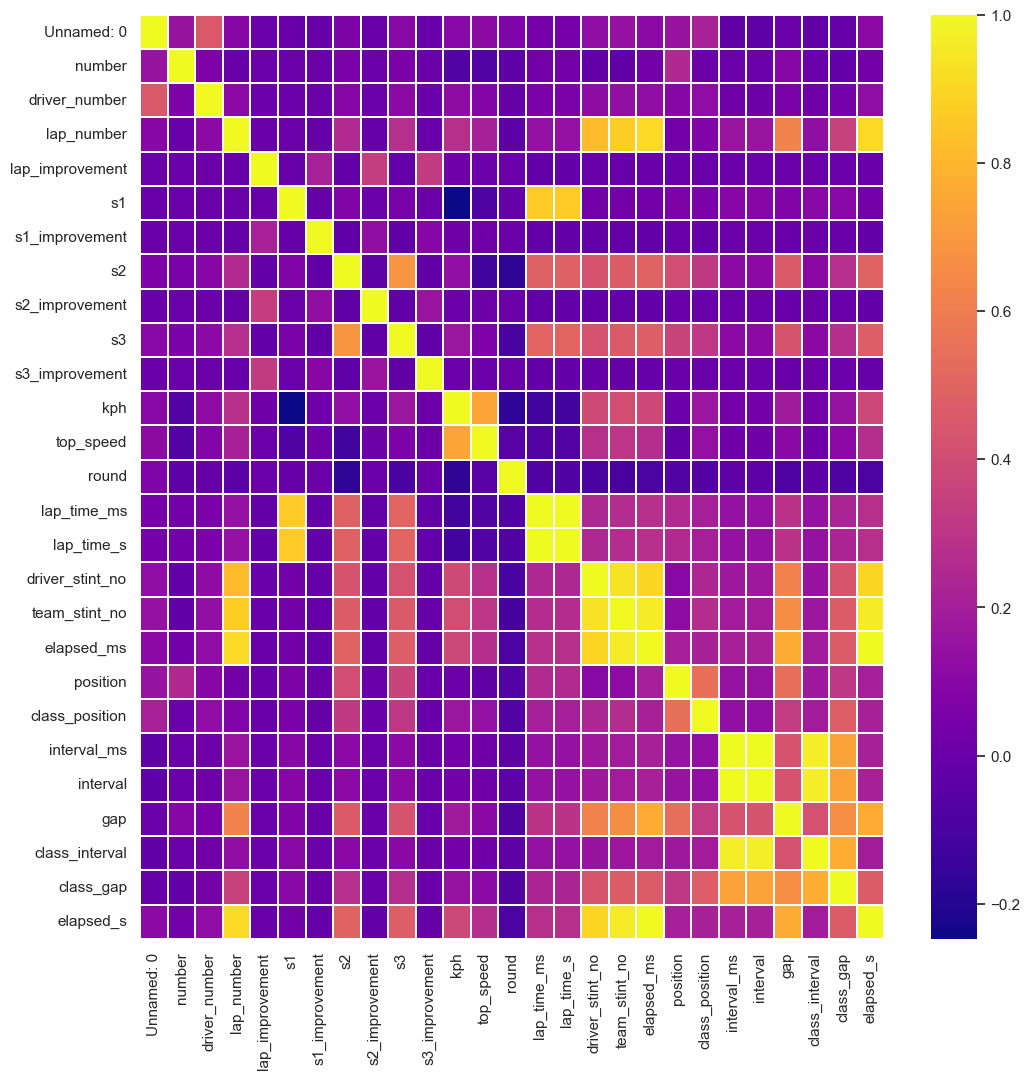

In [96]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation,cmap='plasma',linecolor='white',linewidths=0.3)


In [97]:
#Removing unvanted columns and columns with duplicate values
df.drop(columns=['Unnamed: 0','driver_name','lap_time','lap_time_ms','team_no','s1_improvement','s2_improvement','s3_improvement','s1_large','s2_large','s3_large','lap_improvement','elapsed_s','elapsed','hour','driver_stint','team_stint','vehicle','class_position'],axis=1,inplace=True)
df.shape

(503680, 25)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503680 entries, 0 to 503679
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   number           503680 non-null  int64  
 1   driver_number    503680 non-null  int64  
 2   lap_number       503680 non-null  int64  
 3   s1               503680 non-null  float64
 4   s2               503680 non-null  float64
 5   s3               503680 non-null  float64
 6   kph              503680 non-null  float64
 7   top_speed        503680 non-null  float64
 8   class            503680 non-null  object 
 9   team             503680 non-null  object 
 10  manufacturer     503680 non-null  object 
 11  season           503680 non-null  object 
 12  circuit          503680 non-null  object 
 13  round            503680 non-null  int64  
 14  lap_time_s       503680 non-null  float64
 15  engine           503680 non-null  object 
 16  driver_stint_no  503680 non-null  int6

In [99]:
df['season'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, '2017', '2018-2019',
       '2019-2020', '2021', 2021, 2022], dtype=object)

In [100]:
# Converting the feature 'season' from mixed dtypes to int dtype

df['season']=df['season'].astype(str)
df[['season_start','season_end']]=df['season'].str.split('-',expand=True)
df['season_start'].value_counts()

season_start
2018    69443
2016    62095
2012    54432
2017    53964
2019    52972
2015    52702
2021    50051
2014    43644
2013    34083
2022    30294
Name: count, dtype: int64

In [101]:
#Dropping season and season end

df.drop(columns=['season','season_end'],axis=1,inplace=True)

In [102]:
# Convert 'season_start' to integer
df['season_start'] = pd.to_numeric(df['season_start'])

In [103]:
df['circuit'].unique()

array(['SEBRING', 'SPA FRANCORCHAMPS', 'LE MANS', 'INTERLAGOS',
       'SILVERSTONE', 'BAHRAIN INTERNATIONAL CIRCUIT', 'FUJI SPEEDWAY',
       'SHANGHAI INTERNATIONAL CIRCUIT', 'CIRCUIT OF THE AMERICAS',
       'NURBURGRING', 'AUTODROMO HERMANOS RODRIGUEZ', 'LE MANS 2018',
       'SPA FRANCORCHAMPS 2019', 'LE MANS 2019',
       'BAHRAIN INTERNATIONAL CIRCUIT 2019',
       'BAHRAIN INTERNATIONAL CIRCUIT 2020', 'AUTODROMO DO ALGARVE',
       'AUTODROMO NAZIONALE DI MONZA',
       'BAHRAIN INTERNATIONAL CIRCUIT 6 HOURS',
       'BAHRAIN INTERNATIONAL CIRCUIT 8 HOURS'], dtype=object)

LE MANS                                   11 /
SPA FRANCORCHAMPS                         18 / 
FUJI SPEEDWAY                             9  /
SILVERSTONE                               17 /
SHANGHAI INTERNATIONAL CIRCUIT            16 /
BAHRAIN INTERNATIONAL CIRCUIT             3 /
CIRCUIT OF THE AMERICAS                   8 /
SEBRING                                   15 /
LE MANS 2019                              13 /
LE MANS 2018                              12 /
NURBURGRING                               14 /
INTERLAGOS                                10 /
AUTODROMO HERMANOS RODRIGUEZ              1 / 
AUTODROMO DO ALGARVE                       0 /  
BAHRAIN INTERNATIONAL CIRCUIT 2019         4 /
BAHRAIN INTERNATIONAL CIRCUIT 8 HOURS      7 /
AUTODROMO NAZIONALE DI MONZA               2 /
BAHRAIN INTERNATIONAL CIRCUIT 2020         5 /
BAHRAIN INTERNATIONAL CIRCUIT 6 HOURS      6 /
SPA FRANCORCHAMPS 2019                     19 

In [104]:
# coverting all strings to lowercase and removes  digits, whitespaces and the hour from circuits
import re
cols = ['circuit', 'manufacturer','engine','team']
df['circuit'] = df['circuit'].str.replace(r'\d+', '', regex=True)
df['circuit'] = [re.sub(r'(?i)\b(hours?)\b', '', s).strip() for s in df['circuit']]
df[cols] = df[cols].apply(lambda x: x.str.lower().str.replace(' ', '_', regex=True))
df['circuit'].unique()

array(['sebring', 'spa_francorchamps', 'le_mans', 'interlagos',
       'silverstone', 'bahrain_international_circuit', 'fuji_speedway',
       'shanghai_international_circuit', 'circuit_of_the_americas',
       'nurburgring', 'autodromo_hermanos_rodriguez',
       'autodromo_do_algarve', 'autodromo_nazionale_di_monza'],
      dtype=object)

In [105]:
# AF Corse                     46368
# Aston Martin Racing          34437
# Audi Sport Team Joest        19125
# Toyota Gazoo Racing          18711
# Rebellion Racing             18158
# PR1 Motorsports                157
# G-Drive Racing by Algarve      105
# Highcroft Racing                75
# Eurointernational               26
# Nissan Motorsports Global        5

In [106]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = ohe.fit_transform(df[['circuit', 'engine']])
df_encoded = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(['circuit', 'engine']))

df = pd.concat([df, df_encoded], axis=1).drop(columns=['circuit', 'engine'])

In [107]:
from category_encoders import TargetEncoder

target_enc = TargetEncoder()
df['team_encoded'] = target_enc.fit_transform(df['team'], df['class'])
df['manufacturer_encoded'] = target_enc.fit_transform(df['manufacturer'], df['class'])

df.drop(columns=['team', 'manufacturer'], inplace=True)


#### Visualization

<Axes: >

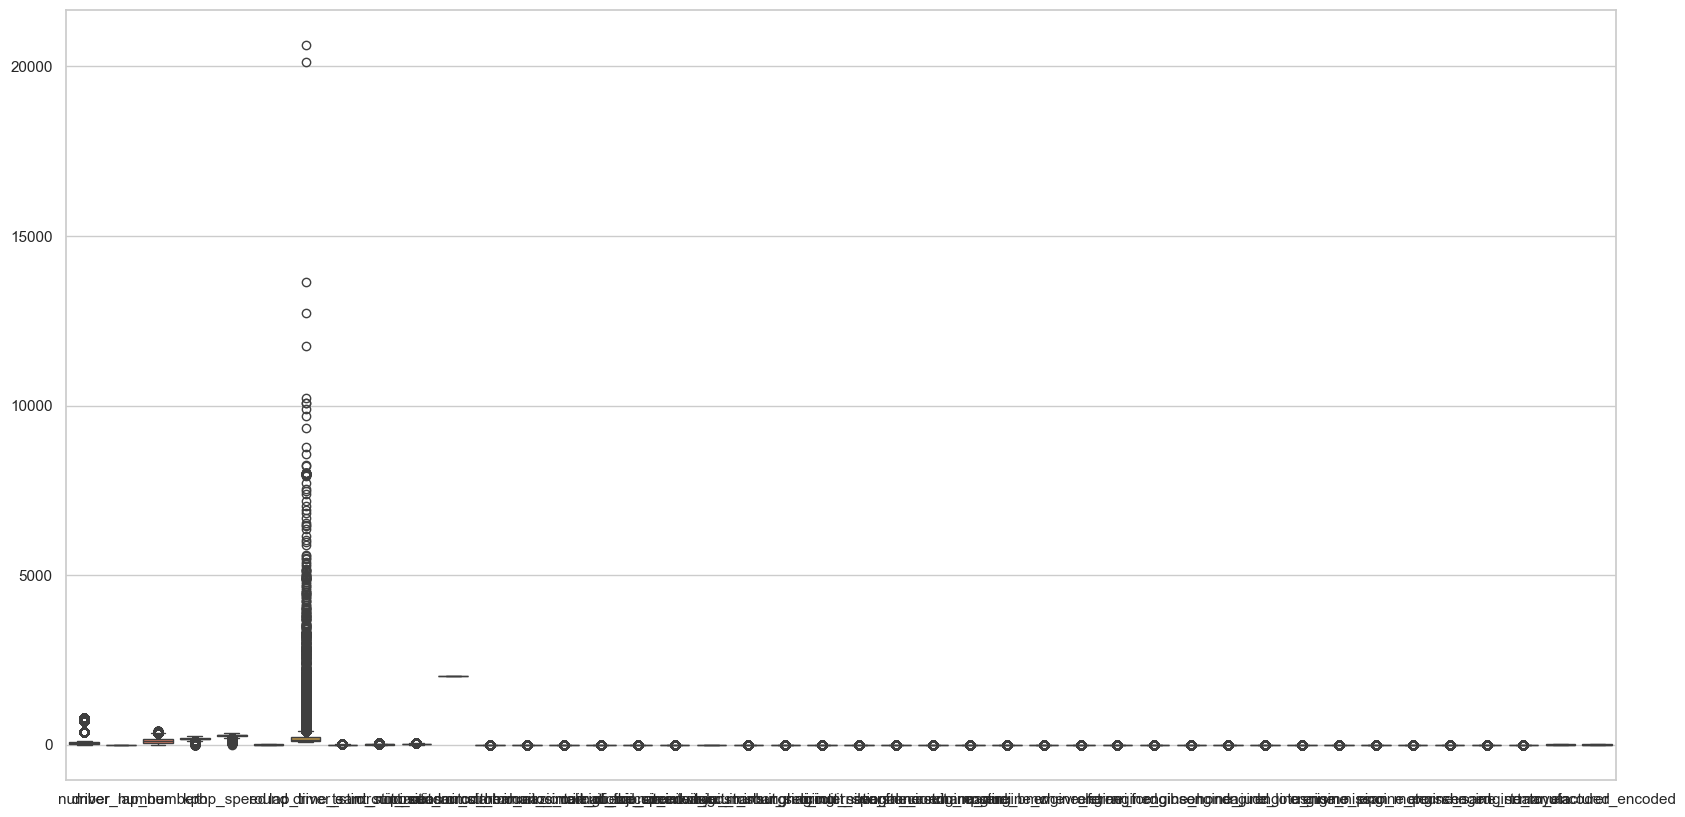

In [108]:
#droping interval_ms, interval, elapsed_ms,gap,class_interval,class_gap as thay do not affect classification

df.drop(columns=['interval_ms', 'interval', 'elapsed_ms','gap','class_interval','class_gap','s1','s2','s3'],axis=1,inplace=True)
plt.figure(figsize=(20,10))
sns.boxplot(df)

In [109]:
df.columns

Index(['number', 'driver_number', 'lap_number', 'kph', 'top_speed', 'class',
       'round', 'lap_time_s', 'driver_stint_no', 'team_stint_no', 'position',
       'season_start', 'circuit_autodromo_hermanos_rodriguez',
       'circuit_autodromo_nazionale_di_monza',
       'circuit_bahrain_international_circuit',
       'circuit_circuit_of_the_americas', 'circuit_fuji_speedway',
       'circuit_interlagos', 'circuit_le_mans', 'circuit_nurburgring',
       'circuit_sebring', 'circuit_shanghai_international_circuit',
       'circuit_silverstone', 'circuit_spa_francorchamps',
       'engine_aston_martin', 'engine_audi', 'engine_bmw', 'engine_chevrolet',
       'engine_ferrari', 'engine_ford', 'engine_gibson', 'engine_honda',
       'engine_judd', 'engine_lotus', 'engine_nismo', 'engine_nissan',
       'engine_pipo_moteurs', 'engine_porsche', 'engine_sard', 'engine_srt',
       'engine_toyota', 'team_encoded', 'manufacturer_encoded'],
      dtype='object')

In [110]:
outlier_columns=['top_speed','kph','position','lap_number','lap_time_s']

def remove_outlier(df,columns):
    for col in columns:
        
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        
        IQR=Q3-Q1
        
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        
        df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
    return df

cleaned_df=remove_outlier(df,outlier_columns)
cleaned_df.shape

(460131, 43)

In [111]:
# undersampled_df=cleaned_df

In [112]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler


x=cleaned_df.drop('class',axis=1)
y=cleaned_df['class']

threshold=5000
class_counts=y.value_counts()
SampleStrategy={lable:threshold for lable, count in class_counts.items() if count > threshold}

RUS=RandomUnderSampler(sampling_strategy=SampleStrategy,random_state=42)

undersampled_x,undersampled_y=RUS.fit_resample(x,y)

undersampled_df=pd.DataFrame(undersampled_x)
undersampled_y=pd.DataFrame(undersampled_y)
undersampled_df=pd.concat((undersampled_df,undersampled_y),axis=1)
undersampled_df

,number,driver_number,lap_number,kph,top_speed,round,lap_time_s,driver_stint_no,team_stint_no,position,...,engine_nismo,engine_nissan,engine_pipo_moteurs,engine_porsche,engine_sard,engine_srt,engine_toyota,team_encoded,manufacturer_encoded,class
13232,0,1,1,187.3,280.2,3,261.958,1,1,31.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.021311,4.403875,CDNT
13288,0,1,2,207.7,295.3,3,236.264,1,1,30.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.021311,4.403875,CDNT
13344,0,1,3,207.6,298.5,3,236.285,1,1,32.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.021311,4.403875,CDNT
13400,0,1,4,212.1,299.3,3,231.298,1,1,32.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.021311,4.403875,CDNT
13456,0,1,5,213.6,293.7,3,229.693,1,1,30.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.021311,4.403875,CDNT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155446,30,0,278,217.2,298.8,3,225.859,9,30,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,LMP2
35869,35,1,64,189.8,250.6,5,111.700,3,2,26.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.560291,7.748151,LMP2
380183,38,3,221,176.2,296.7,2,93.245,4,9,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,7.978207,LMP2
122870,27,1,11,171.5,263.6,7,113.597,1,1,9.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.595374,7.978207,LMP2


In [113]:
# reset index values

undersampled_df.reset_index(drop=True,inplace=True)
undersampled_df

,number,driver_number,lap_number,kph,top_speed,round,lap_time_s,driver_stint_no,team_stint_no,position,...,engine_nismo,engine_nissan,engine_pipo_moteurs,engine_porsche,engine_sard,engine_srt,engine_toyota,team_encoded,manufacturer_encoded,class
0,0,1,1,187.3,280.2,3,261.958,1,1,31.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.021311,4.403875,CDNT
1,0,1,2,207.7,295.3,3,236.264,1,1,30.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.021311,4.403875,CDNT
2,0,1,3,207.6,298.5,3,236.285,1,1,32.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.021311,4.403875,CDNT
3,0,1,4,212.1,299.3,3,231.298,1,1,32.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.021311,4.403875,CDNT
4,0,1,5,213.6,293.7,3,229.693,1,1,30.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.021311,4.403875,CDNT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33056,30,0,278,217.2,298.8,3,225.859,9,30,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,LMP2
33057,35,1,64,189.8,250.6,5,111.700,3,2,26.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.560291,7.748151,LMP2
33058,38,3,221,176.2,296.7,2,93.245,4,9,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,7.978207,LMP2
33059,27,1,11,171.5,263.6,7,113.597,1,1,9.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.595374,7.978207,LMP2


<Axes: >

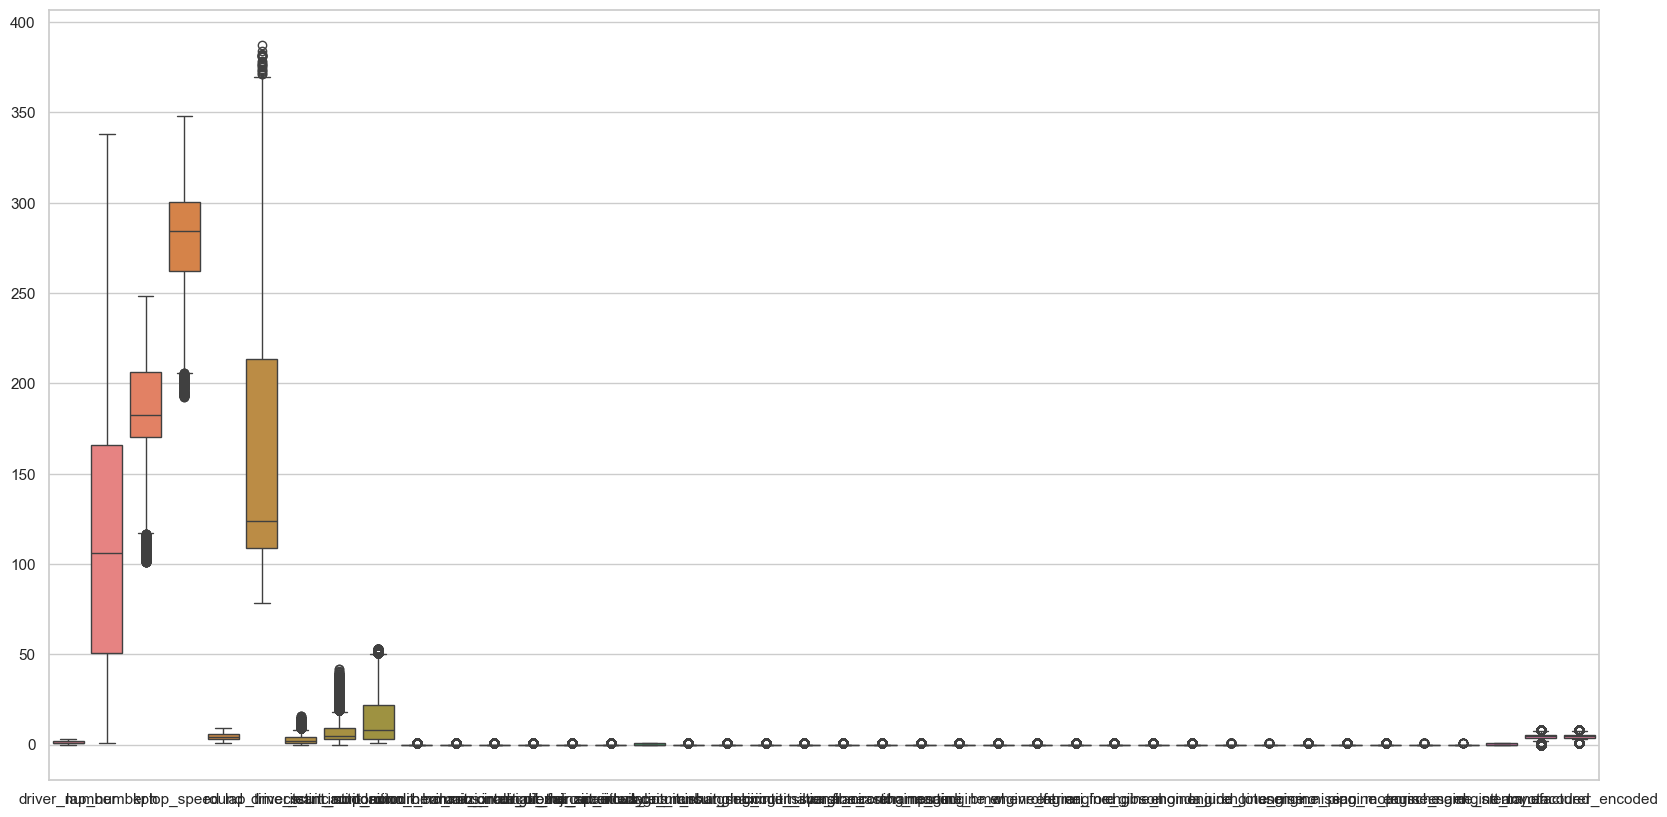

In [114]:
plt.figure(figsize=(20,10))
sns.boxplot(undersampled_df.drop(columns=['number','season_start'],axis=1))

C:\Users\joeva\AppData\Local\Temp\ipykernel_12200\1615867066.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class',data=undersampled_df,palette='pastel')


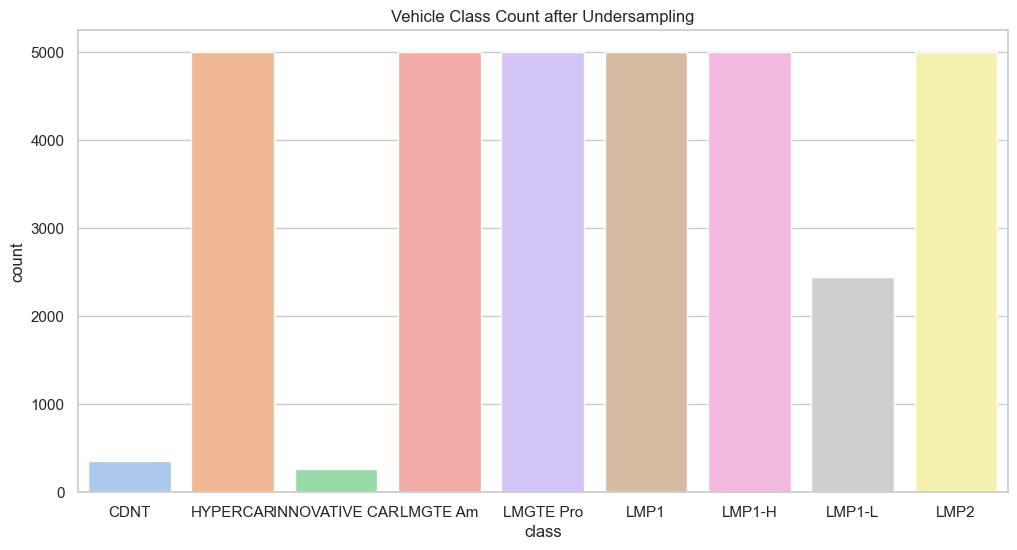

In [115]:
plt.figure(figsize=(12,6))
sns.countplot(x='class',data=undersampled_df,palette='pastel')
plt.title('Vehicle Class Count after Undersampling')
plt.show()

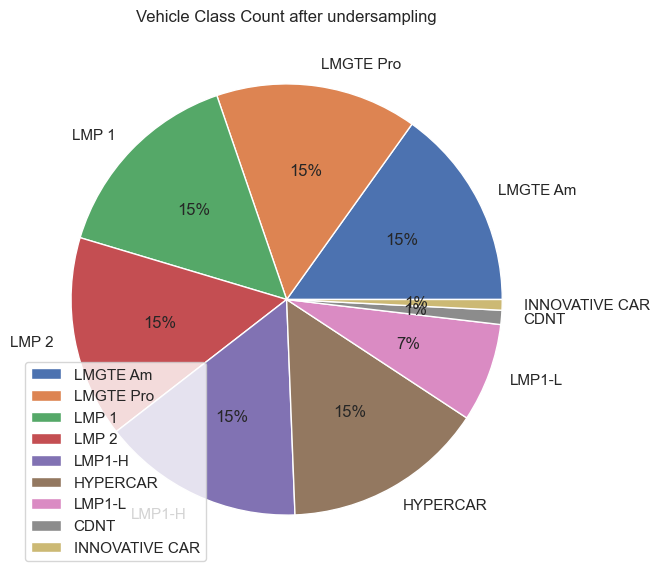

In [116]:
class_order = ['LMGTE Am','LMGTE Pro','LMP 1','LMP 2','LMP1-H','HYPERCAR','LMP1-L','CDNT','INNOVATIVE CAR']
plt.figure(figsize=(7,7))
plt.pie(undersampled_df['class'].value_counts(),labels=class_order,autopct='%1.f%%')
plt.title('Vehicle Class Count after undersampling')
plt.legend(loc='lower left')
plt.show()

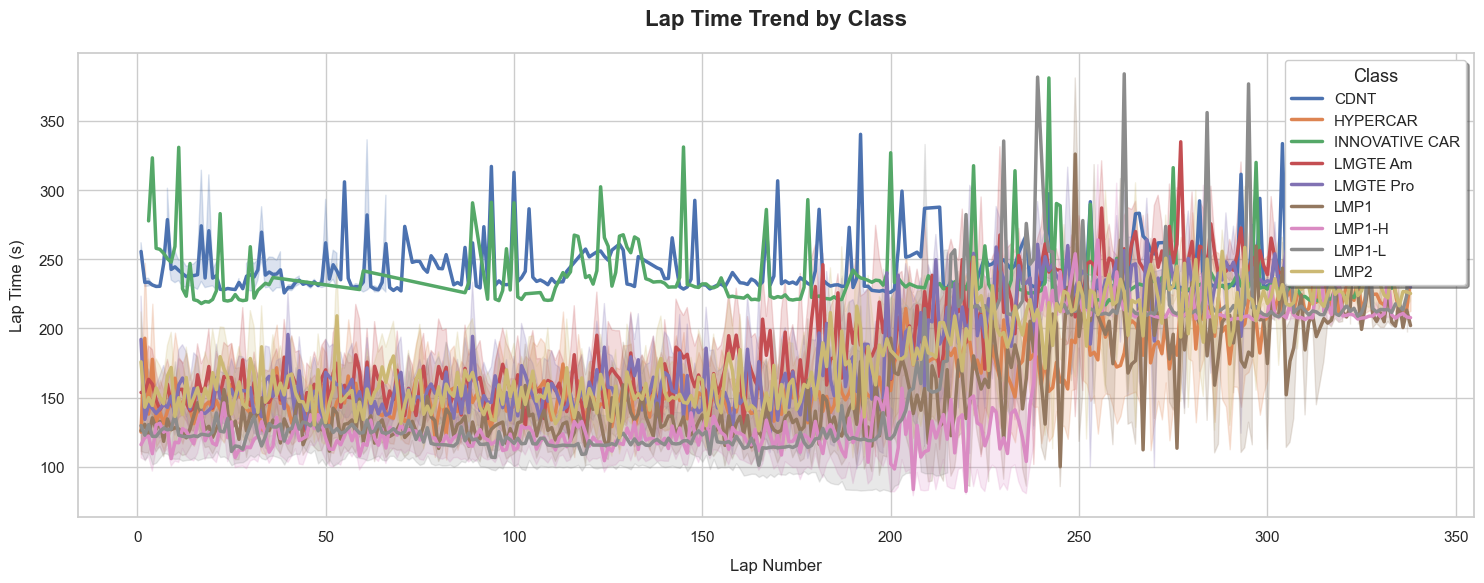

In [117]:
plt.figure(figsize=(15,6))
sns.set_theme(style='whitegrid')
sns.lineplot(data=undersampled_df, x='lap_number',y='lap_time_s',hue='class',linewidth=2.5)
plt.title('Lap Time Trend by Class', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Lap Number', fontsize=12, labelpad=10)
plt.ylabel('Lap Time (s)', fontsize=12, labelpad=10)
plt.legend(title='Class', title_fontsize='13', loc='upper right', frameon=True, shadow=True, fontsize=11)
plt.tight_layout()
plt.show()

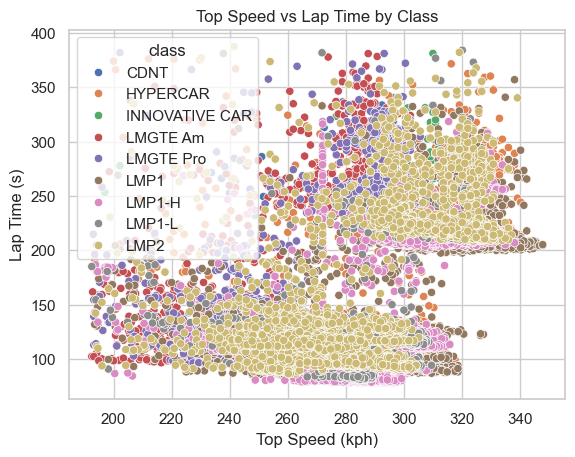

In [118]:
sns.scatterplot(data=undersampled_df, x='top_speed', y='lap_time_s', hue='class')
plt.title('Top Speed vs Lap Time by Class')
plt.xlabel('Top Speed (kph)')
plt.ylabel('Lap Time (s)')
plt.show()

In [119]:
cleaned_df.columns

Index(['number', 'driver_number', 'lap_number', 'kph', 'top_speed', 'class',
       'round', 'lap_time_s', 'driver_stint_no', 'team_stint_no', 'position',
       'season_start', 'circuit_autodromo_hermanos_rodriguez',
       'circuit_autodromo_nazionale_di_monza',
       'circuit_bahrain_international_circuit',
       'circuit_circuit_of_the_americas', 'circuit_fuji_speedway',
       'circuit_interlagos', 'circuit_le_mans', 'circuit_nurburgring',
       'circuit_sebring', 'circuit_shanghai_international_circuit',
       'circuit_silverstone', 'circuit_spa_francorchamps',
       'engine_aston_martin', 'engine_audi', 'engine_bmw', 'engine_chevrolet',
       'engine_ferrari', 'engine_ford', 'engine_gibson', 'engine_honda',
       'engine_judd', 'engine_lotus', 'engine_nismo', 'engine_nissan',
       'engine_pipo_moteurs', 'engine_porsche', 'engine_sard', 'engine_srt',
       'engine_toyota', 'team_encoded', 'manufacturer_encoded'],
      dtype='object')

In [120]:
cleaned_df.head()

,number,driver_number,lap_number,kph,top_speed,class,round,lap_time_s,driver_stint_no,team_stint_no,...,engine_lotus,engine_nismo,engine_nissan,engine_pipo_moteurs,engine_porsche,engine_sard,engine_srt,engine_toyota,team_encoded,manufacturer_encoded
0,57,1,1,151.4,247.6,LMGTE Am,1,143.141,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.932036,3.365037
1,88,2,1,150.4,220.4,LMGTE Am,1,144.016,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.498883,3.668814
2,50,2,1,149.1,233.6,LMGTE Am,1,145.278,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.736097,3.496862
3,70,2,1,148.8,218.3,LMGTE Am,1,145.548,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.736097,3.496862
4,61,2,1,148.5,224.0,LMGTE Am,1,145.859,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,3.365037


#### Model Creation

In [121]:
x=undersampled_df.drop('class',axis=1).values
y=undersampled_df['class'].values
x

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 2.13111402e-02, 4.40387481e+00],
       [0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 2.13111402e-02, 4.40387481e+00],
       [0.00000000e+00, 1.00000000e+00, 3.00000000e+00, ...,
        0.00000000e+00, 2.13111402e-02, 4.40387481e+00],
       ...,
       [3.80000000e+01, 3.00000000e+00, 2.21000000e+02, ...,
        0.00000000e+00, 8.00000000e+00, 7.97820721e+00],
       [2.70000000e+01, 1.00000000e+00, 1.10000000e+01, ...,
        0.00000000e+00, 6.59537422e+00, 7.97820721e+00],
       [4.70000000e+01, 1.00000000e+00, 1.31000000e+02, ...,
        0.00000000e+00, 6.32591544e+00, 7.97820721e+00]],
      shape=(33061, 42))

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train)

[[  4.           1.          90.         ...   0.           5.
    5.        ]
 [  7.           3.         109.         ...   1.           4.12607557
    4.54569182]
 [ 62.           0.         129.         ...   0.           3.
    3.36503745]
 ...
 [708.           1.          18.         ...   0.           1.
    1.        ]
 [ 51.           2.          94.         ...   0.           3.68314355
    3.36503745]
 [ 43.           2.          70.         ...   0.           8.
    8.        ]]


In [123]:
unique_values = []
[unique_values.append(x) for x in y_train if x not in unique_values]
print(unique_values)

['LMP1', 'LMGTE Am', 'CDNT', 'LMGTE Pro', 'LMP2', 'LMP1-H', 'LMP1-L', 'HYPERCAR', 'INNOVATIVE CAR']


In [124]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)




MODEL : KNeighborsClassifier
Accuary : 0.7146889807440266
Precision : 0.714081779932529
                precision    recall  f1-score   support

          CDNT       1.00      0.98      0.99       113
      HYPERCAR       0.85      1.00      0.92      1570
INNOVATIVE CAR       0.96      0.88      0.92        77
      LMGTE Am       0.64      0.66      0.65      1497
     LMGTE Pro       0.70      0.54      0.61      1565
          LMP1       0.56      0.31      0.40      1459
        LMP1-H       0.66      0.84      0.74      1456
        LMP1-L       0.53      0.89      0.67       694
          LMP2       0.91      0.82      0.87      1488

      accuracy                           0.71      9919
     macro avg       0.76      0.77      0.75      9919
  weighted avg       0.71      0.71      0.70      9919




MODEL : SVC
Accuary : 0.9304365359411231
Precision : 0.9334867345655056
                precision    recall  f1-score   support

          CDNT       1.00      0.98      0.99 

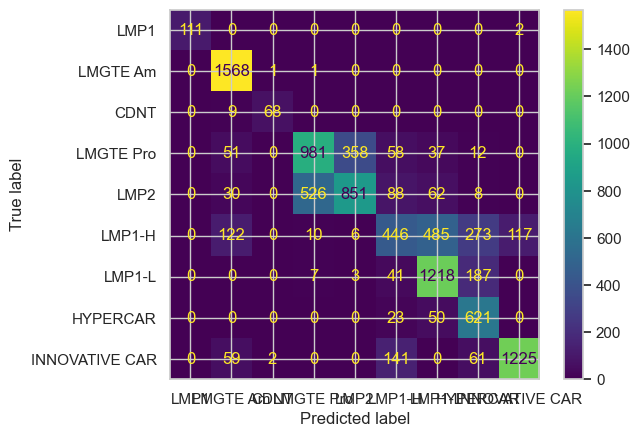

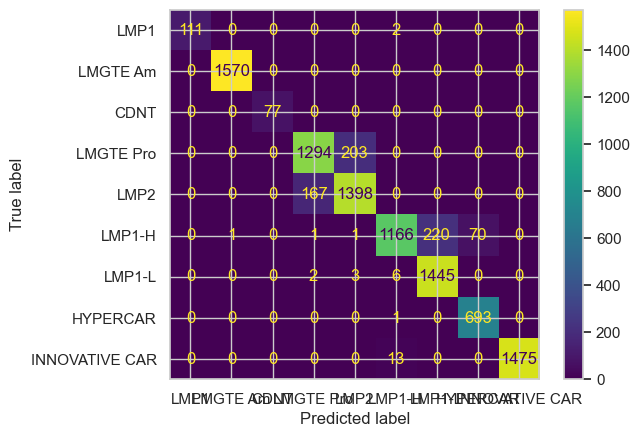

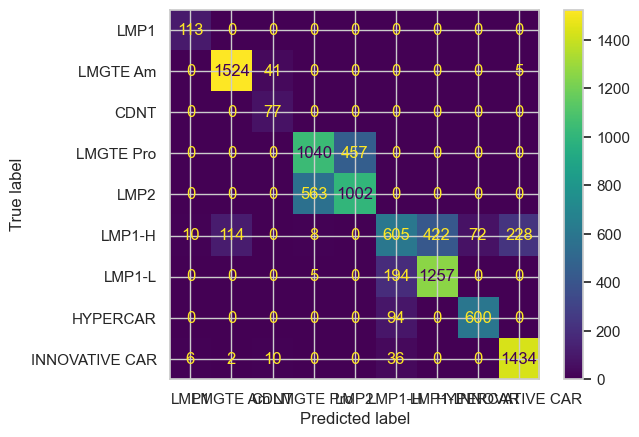

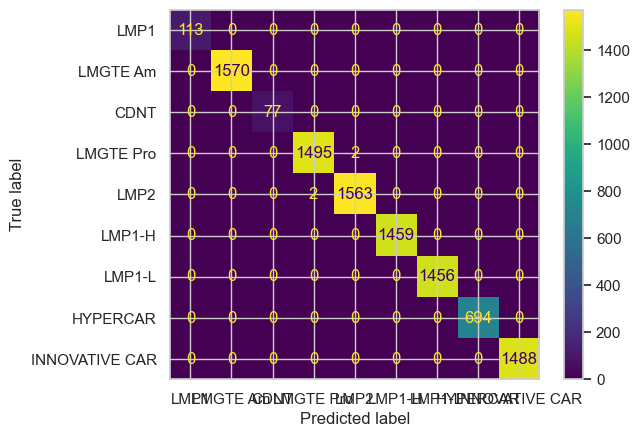

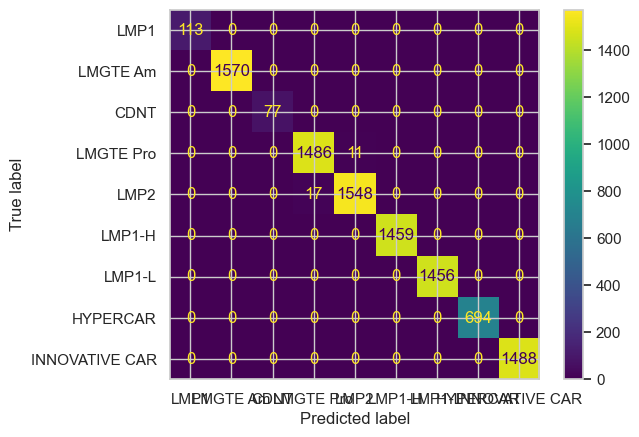

In [125]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

knn=KNeighborsClassifier(n_neighbors=201)
svc=SVC()
nb=BernoulliNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()

models=[knn,svc,nb,dtc,rfc]
model_lst=['KNeighborsClassifier','SVC','BernoulliNB','DecisionTreeClassifier','RandomForestClassifier']

for i in range(len(model_lst)):
    
    model=models[i]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('\n\n')
    print("MODEL :",model_lst[i])
    print('Accuary :',accuracy_score(y_test,y_pred))
    print('Precision :',precision_score(y_test,y_pred,average='weighted'))
    print(classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    cmd=ConfusionMatrixDisplay(cm,display_labels=unique_values)
    cmd.plot()
    plt.Figure(figsize=(8,8))

In [126]:
j=undersampled_df.loc[(undersampled_df['class']=='LMP1-H')&(undersampled_df['engine_porsche'])]

print(j.head(1))

       number  driver_number  lap_number    kph  top_speed  round  lap_time_s  \
20617      20              1         230  191.3      280.5      8      81.102   

       driver_stint_no  team_stint_no  position  ...  engine_nismo  \
20617                3              7       6.0  ...           0.0   

       engine_nissan  engine_pipo_moteurs  engine_porsche  engine_sard  \
20617            0.0                  0.0             1.0          0.0   

       engine_srt  engine_toyota  team_encoded  manufacturer_encoded   class  
20617         0.0            0.0      5.297882              3.668814  LMP1-H  

[1 rows x 43 columns]


In [127]:
#LMGTE Pro :51,1,140,196.2,292.1,3,250.09,4,9,25.0,2012,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3.683144,3.365037 
#CDNT      :0,1,6,212.9,300.2,3,230.502,1,1,30,2012,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.021311,4.403875
#LMP1-H    :20,0,1,190.5,282.7,1,111.298,1,1,5.0,2014,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5.297882,3.668814
#HYPERCAR  :50,22,56,183,350,4,109.122,1,1,1,2024,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4.126076,4.545692

In [128]:
#sample input :['number', 'driver_number', 'lap_number', 'kph', 'top_speed','round', 'lap_time_s', 'driver_stint_no', 'team_stint_no', 'position',
    #    'season_start', 'circuit_autodromo_hermanos_rodriguez','circuit_autodromo_nazionale_di_monza','circuit_bahrain_international_circuit',
    #    'circuit_circuit_of_the_americas', 'circuit_fuji_speedway','circuit_interlagos', 'circuit_le_mans', 'circuit_nurburgring','circuit_sebring',
    #    'circuit_shanghai_international_circuit','circuit_silverstone', 'circuit_spa_francorchamps','engine_aston_martin', 'engine_audi', 'engine_bmw',
    #    'engine_chevrolet','engine_ferrari', 'engine_ford', 'engine_gibson', 'engine_honda','engine_judd', 'engine_lotus', 'engine_nismo', 'engine_nissan',
    #    'engine_pipo_moteurs', 'engine_porsche', 'engine_sard', 'engine_srt','engine_toyota', 'team_encoded', 'manufacturer_encoded'],
test_case=[
           [50,22,56,183,350,4,109.122,1,1,1,2024,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4.126076,4.545692],    #Hypercar
           [20,0,1,190.5,282.7,1,111.298,1,1,5.0,2014,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5.297882,3.668814],# LMP1 H
           [0,1,6,212.9,300.2,3,230.502,1,1,30,2012,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.021311,4.403875],  #CDNT
           ]
test_case=scale.transform(test_case)
test_model=knn
test_model.fit(x_train,y_train)
y_pred_t1=test_model.predict(test_case)



In [129]:

test_model2=nb
test_model2.fit(x_train,y_train)
y_pred_t2=test_model2.predict(test_case)


In [130]:

test_model3=svc
test_model3.fit(x_train,y_train)
y_pred_t3=test_model3.predict(test_case)


In [131]:

test_model4=dtc
test_model4.fit(x_train,y_train)
y_pred_t4=test_model4.predict(test_case)


In [132]:
test_model5=rfc
test_model5.fit(x_train,y_train)
y_pred_t5=test_model5.predict(test_case)


In [133]:
output=pd.DataFrame({"KNN":y_pred_t1,"Navie Baies":y_pred_t2,'SVM':y_pred_t3,'DecisionTree':y_pred_t4,'RandomForest':y_pred_t5})
output

,KNN,Navie Baies,SVM,DecisionTree,RandomForest
0,HYPERCAR,LMGTE Pro,LMP2,HYPERCAR,HYPERCAR
1,LMP1-H,LMP1-H,LMP1-H,LMP1-H,LMP1-H
2,LMP1-L,LMGTE Am,LMP2,CDNT,CDNT


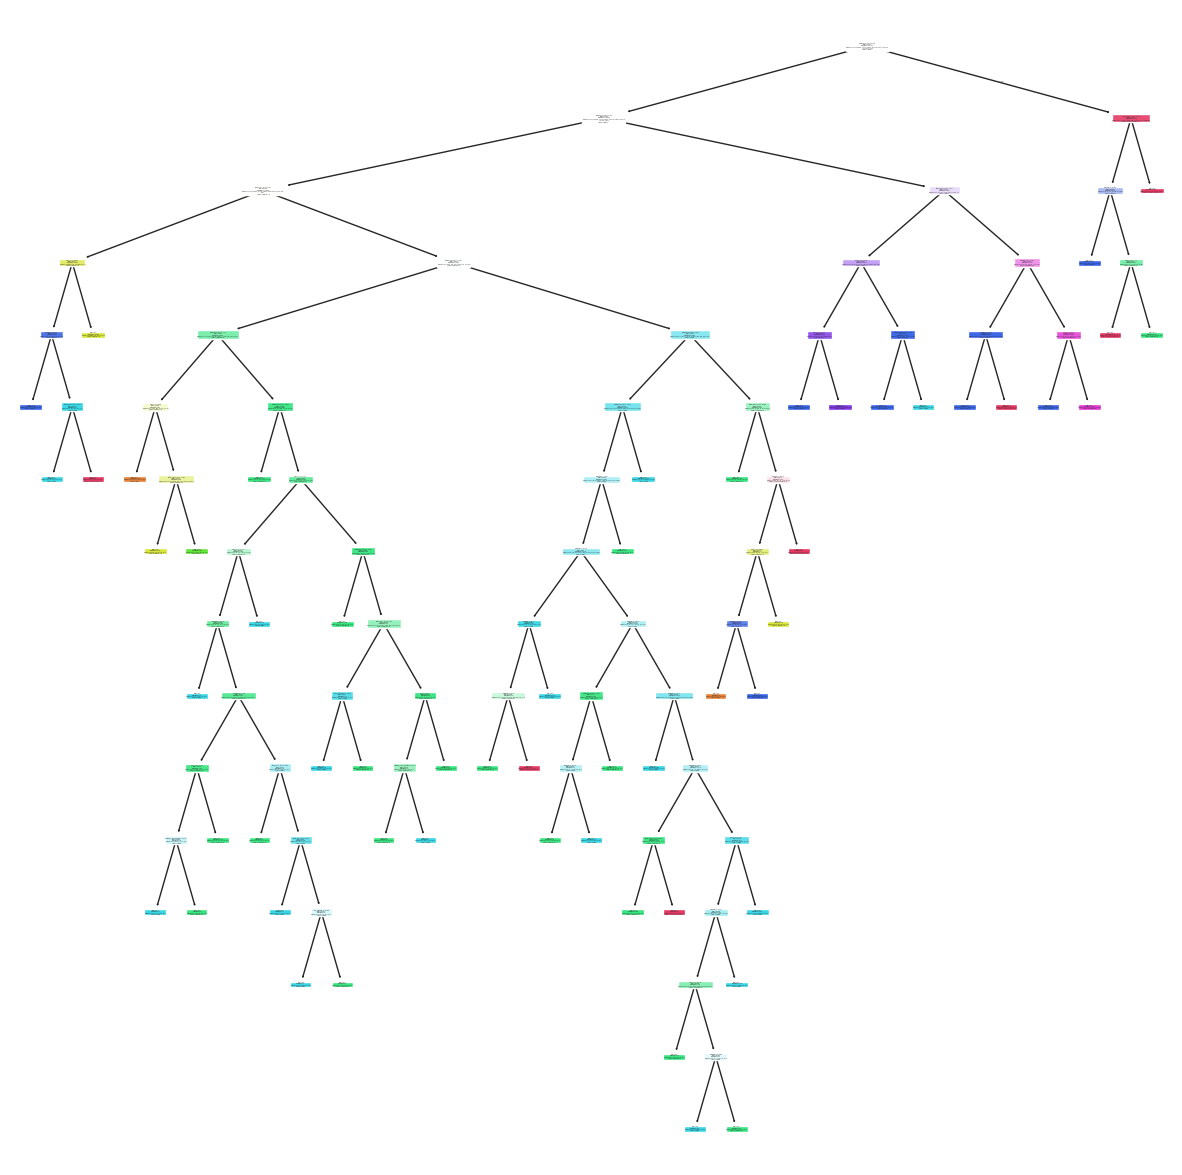

In [134]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(test_model4,feature_names=cleaned_df.columns[:-1],class_names=unique_values,filled=True)
plt.show()

### Improving KNN

In [135]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors':list(range(101,502,50)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree','brute']
}

grid_search = GridSearchCV(knn,params, cv=5, scoring='accuracy',n_jobs=-2)

grid_search.fit(x_train,y_train)


c:\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.75265746 0.84370398 0.72370553 0.82361062 0.69993909 0.80973983
 0.68204934 0.79712195 0.66796267 0.79573912 0.6609193  0.79427003
 0.64834485 0.79301691 0.6412149  0.79396778 0.6377147  0.79491836
        nan 0.8901563         nan 0.87624207        nan 0.86755645
        nan 0.86332181        nan 0.86068597        nan 0.85891445
        nan 0.8565378         nan 0.85519831        nan 0.85355623
 0.75265746 0.84370398 0.72370553 0.82361062 0.69993909 0.80973983
 0.68204934 0.79712195 0.66796267 0.79573912 0.6609193  0.79427003
 0.64834485 0.79301691 0.6412149  0.79396778 0.6377147  0.79491836
 0.82132029 0.8901563  0.80563477 0.87624207 0.78917139 0.86755645
 0.77279398 0.86332181 0.76458352 0.86068597 0.75628735 0.85891445
 0.74487961 0.8565378  0.73878688 0.85519831 0.73615073 0.85355623
 0.75265746 0.84370398 0.72370553 0.82361062 0.69993909 0.809739

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=201), n_jobs=-2,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [101, 151, 201, 251, 301, 351, 401, 451,
                                         501],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [136]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 101, 'weights': 'distance'}


Accuary : 0.7146889807440266
Precision : 0.714081779932529
                precision    recall  f1-score   support

          CDNT       1.00      0.98      0.99       113
      HYPERCAR       0.85      1.00      0.92      1570
INNOVATIVE CAR       0.96      0.88      0.92        77
      LMGTE Am       0.64      0.66      0.65      1497
     LMGTE Pro       0.70      0.54      0.61      1565
          LMP1       0.56      0.31      0.40      1459
        LMP1-H       0.66      0.84      0.74      1456
        LMP1-L       0.53      0.89      0.67       694
          LMP2       0.91      0.82      0.87      1488

      accuracy                           0.71      9919
     macro avg       0.76      0.77      0.75      9919
  weighted avg       0.71      0.71      0.70      9919



<Figure size 800x800 with 0 Axes>

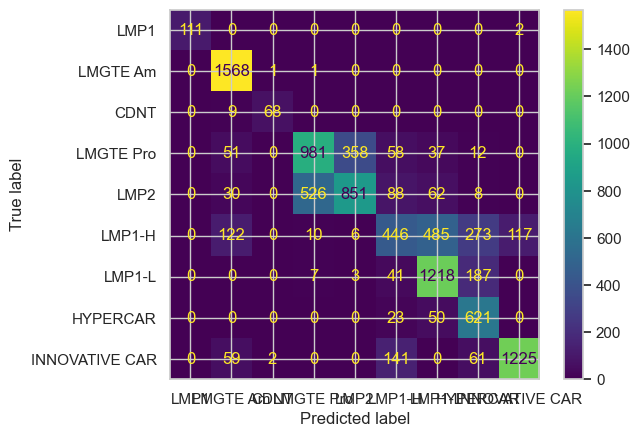

In [144]:
knn=KNeighborsClassifier(n_neighbors=101,algorithm='auto',metric='manhattan',weights='distance')
knn.fit(x_train,y_train)
y_pred=test_model.predict(x_test)
print('Accuary :',accuracy_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=unique_values)
cmd.plot()
plt.Figure(figsize=(8,8))

In [145]:
y_pred=test_model.predict(test_case)
y_pred

array(['HYPERCAR', 'LMP1-H', 'LMP1-L'], dtype=object)